<a href="https://colab.research.google.com/github/zakaria-aabbou/App_sup_project/blob/main/Final_Donn%C3%A9es_Cr%C3%A9dits_bancaires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1 style="text-align:center;font-size: 3em"> Projet « Apprentissage supervisé » </h1>



---
Master2 MLSD

Année académique 2021/2022

Enseignant : Lazhar Labiod

Adresse : LIPADE – Université de Paris

Mail : lazhar.labiod@u-paris.fr

---


## Objectif

L’objectif de ce travail est la mise en pratique concrète d’un certain nombre de techniques
d’apprentissage supervisé (Bayesien Naïf, KNN, LDA, QDA, Linear SVM, Non Linear SVM,
Régression logistique, CART et Random Forest), à travers l’étude de données réelles
nécessitant l’utilisation de logiciels de traitement statistique de données R ou Python. Les
applications visées concernent deux types de données réelles.

# 1. Données Crédits bancaires :

L'ensemble de données de crédits décrit les détails financiers et bancaires des
clients et la tâche consiste à déterminer si le client est bon ou mauvais. L'hypothèse
est que la tâche consiste à prédire si un client remboursera un prêt ou un crédit.
L'ensemble de données comprend 1000 exemples et 20 variables, dont 7
numériques (entiers) et 13 catégorielles



*   Noms des variables :

(
    
Statut du compte courant existant, 

Durée en mois,

Historique de crédit,

Objectif,

Montant du crédit,

Compte d'épargne, 

Emploi actuel depuis, 

Taux de versement en,

pourcentage du revenu disponible, 

Statut personnel et sexe, 

Autres débiteurs,

Résidence actuelle depuis,

Propriété, 

Age en années, 

Autres plans de versement,

Logement, 

Nombre de crédits existants dans cette banque, 

Travail,

Nombre de personnes à charge, 

Téléphone, 

Travailleur étranger

).

Source des données Crédits :

https://raw.githubusercontent.com/jbrownlee/Datasets/master/german.csv



Import des packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold, cross_val_predict

In [ ]:
#Importing necessary packages in Python 

from sklearn.datasets import make_classification 
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, roc_auc_score, auc, accuracy_score
from sklearn.model_selection import ShuffleSplit,train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler, MinMaxScaler


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

## EDA (Exploratory of Data Analysis)

### 2.1. Data Preperation

In [ ]:
link_data = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/german.csv'

colums = ['checking_account_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings', 'present_employment', 'installment_rate',
       'status_sex', 'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'existing_credits', 'job',
       'dependents', 'telephone', 'foreign_worker', 'customer_type']


In [ ]:
data = pd.read_csv(link_data , names=colums)
data.head()

,checking_account_status,duration,credit_history,purpose,credit_amount,savings,present_employment,installment_rate,status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,customer_type
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [ ]:
data.shape

(1000, 21)

In [ ]:
data.columns

Index(['checking_account_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings', 'present_employment', 'installment_rate',
       'status_sex', 'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'existing_credits', 'job',
       'dependents', 'telephone', 'foreign_worker', 'customer_type'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   checking_account_status  1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   credit_amount            1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   present_employment       1000 non-null   object
 7   installment_rate         1000 non-null   int64 
 8   status_sex               1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   int64 
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [ ]:
# Binarize the y output for easier use of e.g. ROC curves -> 0 = 'bad' credit; 1 = 'good' credit
data.customer_type.replace([1,2], [1,0], inplace=True)
# Print number of 'good' credits (should be 700) and 'bad credits (should be 300)
data.customer_type.value_counts()

1    700
0    300
Name: customer_type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


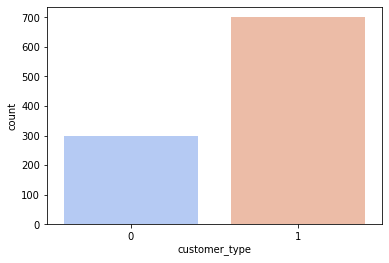

In [ ]:
sns.countplot(data['customer_type'],palette='coolwarm')

StandardScaler

In [ ]:
#numerical variables labels
numvars = ['duration', 'credit_amount', 'installment_rate', 'present_residence', 'age', 
           'existing_credits', 'dependents', 'customer_type']

# Standardization
numdata_std = pd.DataFrame(StandardScaler().fit_transform(data[numvars].drop(['customer_type'], axis=1)))

In [ ]:
numdata_std

,0,1,2,3,4,5,6
0,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290
1,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290
2,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869
3,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869
4,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869
...,...,...,...,...,...,...,...
995,-0.738668,-0.544162,0.024147,1.046987,-0.399832,-0.704926,-0.428290
996,0.754763,0.207612,0.918477,1.046987,0.391740,-0.704926,-0.428290
997,-0.738668,-0.874503,0.918477,1.046987,0.215835,-0.704926,-0.428290
998,1.999289,-0.505528,0.918477,1.046987,-1.103451,-0.704926,-0.428290


Encoding Categorical Feature

Labelencoding pour transformer les données catégoriel en numérique, permet une meilleure visualisation que l'encodage de "one hot encoding"

In [ ]:
from collections import defaultdict

#categorical variables labels
catvars = ['checking_account_status', 'credit_history', 'purpose', 'savings', 'present_employment',
           'status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job', 
           'telephone', 'foreign_worker']

d = defaultdict(LabelEncoder)

# Encoding the variable
lecatdata = data[catvars].apply(lambda x: d[x.name].fit_transform(x))

# print transformations
for x in range(len(catvars)):
    print(catvars[x],": ", data[catvars[x]].unique())
    print(catvars[x],": ", lecatdata[catvars[x]].unique())

#One hot encoding, create dummy variables for every category of every categorical variable
dummyvars = pd.get_dummies(data[catvars])

checking_account_status :  ['A11' 'A12' 'A14' 'A13']
checking_account_status :  [0 1 3 2]
credit_history :  ['A34' 'A32' 'A33' 'A30' 'A31']
credit_history :  [4 2 3 0 1]
purpose :  ['A43' 'A46' 'A42' 'A40' 'A41' 'A49' 'A44' 'A45' 'A410' 'A48']
purpose :  [4 7 3 0 1 9 5 6 2 8]
savings :  ['A65' 'A61' 'A63' 'A64' 'A62']
savings :  [4 0 2 3 1]
present_employment :  ['A75' 'A73' 'A74' 'A71' 'A72']
present_employment :  [4 2 3 0 1]
status_sex :  ['A93' 'A92' 'A91' 'A94']
status_sex :  [2 1 0 3]
other_debtors :  ['A101' 'A103' 'A102']
other_debtors :  [0 2 1]
property :  ['A121' 'A122' 'A124' 'A123']
property :  [0 1 3 2]
other_installment_plans :  ['A143' 'A141' 'A142']
other_installment_plans :  [2 0 1]
housing :  ['A152' 'A153' 'A151']
housing :  [1 2 0]
job :  ['A173' 'A172' 'A174' 'A171']
job :  [2 1 3 0]
telephone :  ['A192' 'A191']
telephone :  [1 0]
foreign_worker :  ['A201' 'A202']
foreign_worker :  [0 1]


Concate Transformed Dataset

append the dummy variable of the initial numerical variables numvars# append

In [ ]:
data_clean = pd.concat([data[numvars], dummyvars], axis = 1)

print(data_clean.shape)

(1000, 62)


In [ ]:
data_clean

,duration,credit_amount,installment_rate,present_residence,age,existing_credits,dependents,customer_type,checking_account_status_A11,checking_account_status_A12,checking_account_status_A13,checking_account_status_A14,credit_history_A30,credit_history_A31,credit_history_A32,credit_history_A33,credit_history_A34,purpose_A40,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,savings_A61,savings_A62,savings_A63,savings_A64,savings_A65,present_employment_A71,present_employment_A72,present_employment_A73,present_employment_A74,present_employment_A75,status_sex_A91,status_sex_A92,status_sex_A93,status_sex_A94,other_debtors_A101,other_debtors_A102,other_debtors_A103,property_A121,property_A122,property_A123,property_A124,other_installment_plans_A141,other_installment_plans_A142,other_installment_plans_A143,housing_A151,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreign_worker_A201,foreign_worker_A202
0,6,1169,4,4,67,2,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0
1,48,5951,2,2,22,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0
2,12,2096,2,3,49,1,2,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0
3,42,7882,2,4,45,1,2,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0
4,24,4870,3,4,53,2,2,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0
996,30,3857,4,4,40,1,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,1,0
997,12,804,4,4,38,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0
998,45,1845,4,4,23,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0


Split Training Dataset

In [ ]:
X_clean = data_clean.drop('customer_type', axis=1)
y_clean = data_clean['customer_type']
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=1)

In [ ]:
X_train.keys()

Index(['duration', 'credit_amount', 'installment_rate', 'present_residence',
       'age', 'existing_credits', 'dependents', 'checking_account_status_A11',
       'checking_account_status_A12', 'checking_account_status_A13',
       'checking_account_status_A14', 'credit_history_A30',
       'credit_history_A31', 'credit_history_A32', 'credit_history_A33',
       'credit_history_A34', 'purpose_A40', 'purpose_A41', 'purpose_A410',
       'purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45',
       'purpose_A46', 'purpose_A48', 'purpose_A49', 'savings_A61',
       'savings_A62', 'savings_A63', 'savings_A64', 'savings_A65',
       'present_employment_A71', 'present_employment_A72',
       'present_employment_A73', 'present_employment_A74',
       'present_employment_A75', 'status_sex_A91', 'status_sex_A92',
       'status_sex_A93', 'status_sex_A94', 'other_debtors_A101',
       'other_debtors_A102', 'other_debtors_A103', 'property_A121',
       'property_A122', 'property_A123', 'prop

Balance data

In [ ]:
from imblearn.over_sampling import SMOTE

# Oversampling
# http://contrib.scikit-learn.org/imbalanced-learn/auto_examples/combine/plot_smote_enn.html#sphx-glr-auto-examples-combine-plot-smote-enn-py

# Apply SMOTE
sm = SMOTE(sampling_strategy='auto')
X_train_clean_res, y_train_clean_res = sm.fit_resample(X_train, y_train)

# Print number of 'good' credits and 'bad credits, should be fairly balanced now
print("Before/After clean")
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))
unique, counts = np.unique(y_train_clean_res, return_counts=True)
print(dict(zip(unique, counts)))

Before/After clean
{0: 241, 1: 559}
{0: 559, 1: 559}


In [ ]:
#Great, before we do anything else, let's split the data into train/test.
X_train_clean_res = pd.DataFrame(X_train_clean_res, columns=X_train.keys())
y_train_clean_res = pd.DataFrame(y_train_clean_res)

In [ ]:
X_train_clean_res['customer_type'] = y_train_clean_res
data_balanced = X_train_clean_res
data_balanced

,duration,credit_amount,installment_rate,present_residence,age,existing_credits,dependents,checking_account_status_A11,checking_account_status_A12,checking_account_status_A13,checking_account_status_A14,credit_history_A30,credit_history_A31,credit_history_A32,credit_history_A33,credit_history_A34,purpose_A40,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,savings_A61,savings_A62,savings_A63,savings_A64,savings_A65,present_employment_A71,present_employment_A72,present_employment_A73,present_employment_A74,present_employment_A75,status_sex_A91,status_sex_A92,status_sex_A93,status_sex_A94,other_debtors_A101,other_debtors_A102,other_debtors_A103,property_A121,property_A122,property_A123,property_A124,other_installment_plans_A141,other_installment_plans_A142,other_installment_plans_A143,housing_A151,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreign_worker_A201,foreign_worker_A202,customer_type
0,22,1283,4,4,25,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,1
1,12,2390,4,3,50,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,1
2,21,2923,1,1,28,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,1
3,6,1352,1,2,23,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,1
4,18,3190,2,2,24,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,44,14219,4,2,46,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0
1114,24,2397,3,2,34,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1115,30,5210,3,2,27,2,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0
1116,14,950,4,3,32,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


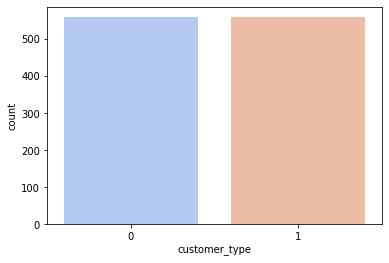

In [ ]:
sns.countplot(data_balanced['customer_type'],palette='coolwarm')

In [ ]:
print(np.shape(X_train_clean_res))
print(np.shape(y_train_clean_res))
print(np.shape(X_test)) 
print(np.shape(y_test))

(1118, 62)
(1118, 1)
(200, 61)
(200,)


## Functions of train

In [ ]:
# scoring = 'accuracy'
# scoring = 'normalized_mutual_info_score'
# scoring = 'f1_weighted'

# f1’ metrics.f1_score for binary targets
# ‘f1_micro’ metrics.f1_score micro-averaged
# ‘f1_macro’ metrics.f1_score macro-averaged
# ‘f1_weighted’ metrics.f1_score weighted average
# ‘f1_samples’ metrics.f1_score by multilabel sample

# Test options and evaluation metric
num_folds = 5 # 10
seed = None
scoring_accuracy = 'accuracy'
scoring_nmi = 'normalized_mutual_info_score'
scoring_f1 = 'f1_weighted'

In [ ]:
def Spot_Check_Algorithms(X_train , Y_train):

    # Spot Check Algorithms
    models = []
    models.append(('LR', LogisticRegression(max_iter=2000)))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    # models.append(('QDA', QDA()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC()))

    results_accuracy = []
    results_nmi = []
    results_f1 = []

    mean_accuracy = []
    mean_nmi = []
    mean_f1 = []

    names_Spot_Check_Algorithms = []
    best_res = -1
    best_cv_results = []
    y_probas_pred = []
    best_prediction = {}

    for name, model in models:
        kfold = KFold(n_splits=num_folds, random_state=seed)

        # Accuracy
        cv_results_accuracy = cross_val_score(model, X_train, Y_train.ravel(), cv=kfold, scoring=scoring_accuracy)
        if cv_results_accuracy.mean() > best_res:
            best_res = cv_results_accuracy.mean()
            y_probas_pred = cross_val_predict(model,X_train, Y_train.ravel(), cv=kfold, method="predict_proba")
        results_accuracy.append(cv_results_accuracy)
        msg = "%s: %f (%f)" % (name, cv_results_accuracy.mean(), cv_results_accuracy.std())
        print("Accuracy : " , msg)
        mean_accuracy.append(cv_results_accuracy.mean())

        # nmi
        cv_results_nmi = cross_val_score(model, X_train, Y_train.ravel(), cv=kfold, scoring=scoring_nmi)
        results_nmi.append(cv_results_nmi)
        msg = "%s: %f (%f)" % (name, cv_results_nmi.mean(), cv_results_nmi.std())
        print("nmi : " , msg)
        mean_nmi.append(cv_results_nmi.mean())

        # f1_score
        cv_results_f1 = cross_val_score(model, X_train, Y_train.ravel(), cv=kfold, scoring=scoring_f1)
        results_f1.append(cv_results_f1)
        msg = "%s: %f (%f)" % (name, cv_results_f1.mean(), cv_results_f1.std())
        print("f1_score : " , msg)
        mean_f1.append(cv_results_f1.mean())

        names_Spot_Check_Algorithms.append(name)
        best_prediction[name] = y_probas_pred
        print("############################################################")
 
    results_Spot_Check_Algorithms  = pd.DataFrame({
        'Accuracy'  : mean_accuracy,
        'NMI'       : mean_nmi,
        'F1_score'  : mean_f1
    }, index = names_Spot_Check_Algorithms)
    
    # Compare Algorithms

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

    axes[0].set_title('Algorithm Comparison Accuracy')
    axes[0].boxplot(results_accuracy)
    axes[0].set_xticklabels(names_Spot_Check_Algorithms)

    axes[1].set_title('Algorithm Comparison NMI')
    axes[1].boxplot(results_nmi)
    axes[1].set_xticklabels(names_Spot_Check_Algorithms)

    axes[2].set_title('Algorithm Comparison F1')
    axes[2].boxplot(results_f1)
    axes[2].set_xticklabels(names_Spot_Check_Algorithms)

    fig.tight_layout()

    return results_Spot_Check_Algorithms , best_prediction

In [ ]:
def ensembles_methods(X_train , Y_train):
    # ensembles
    ensembles = []
    ensembles.append(('AB', AdaBoostClassifier()))
    # ensembles.append(('GBM', GradientBoostingClassifier()))
    ensembles.append(('LGBM', lgb.LGBMClassifier()))
    # ensembles.append(('CB', CatBoostClassifier(silent=True)))
    ensembles.append(('RF', RandomForestClassifier()))
    ensembles.append(('ET', ExtraTreesClassifier()))
    ensembles.append(('XGB', XGBClassifier(learning_rate=0.3)))



    results_accuracy = []
    results_nmi = []
    results_f1 = []

    mean_accuracy = []
    mean_nmi = []
    mean_f1 = []

    names_ensembles = []
    best_res = -1
    best_cv_results = []
    y_probas_pred = []
    best_prediction = {}

    for name, model in ensembles:
        kfold = KFold(n_splits=num_folds, random_state=seed)

        # Accuracy
        cv_results_accuracy = cross_val_score(model, X_train, Y_train.ravel(), cv=kfold, scoring=scoring_accuracy)
        if cv_results_accuracy.mean() > best_res:
            best_res = cv_results_accuracy.mean()
            y_probas_pred = cross_val_predict(model,X_train, Y_train.ravel(), cv=kfold, method="predict_proba")
        results_accuracy.append(cv_results_accuracy)
        msg = "%s: %f (%f)" % (name, cv_results_accuracy.mean(), cv_results_accuracy.std())
        print("Accuracy : " , msg)
        mean_accuracy.append(cv_results_accuracy.mean())

        # nmi
        cv_results_nmi = cross_val_score(model, X_train, Y_train.ravel(), cv=kfold, scoring=scoring_nmi)
        results_nmi.append(cv_results_nmi)
        msg = "%s: %f (%f)" % (name, cv_results_nmi.mean(), cv_results_nmi.std())
        print("nmi : " , msg)
        mean_nmi.append(cv_results_nmi.mean())

        # f1_score
        cv_results_f1 = cross_val_score(model, X_train, Y_train.ravel(), cv=kfold, scoring=scoring_f1)
        results_f1.append(cv_results_f1)
        msg = "%s: %f (%f)" % (name, cv_results_f1.mean(), cv_results_f1.std())
        print("f1_score : " , msg)
        mean_f1.append(cv_results_f1.mean())

        names_ensembles.append(name)
        best_prediction[name] = y_probas_pred
        print("############################################################")

    results_ensembles = pd.DataFrame({
        'Accuracy'  : mean_accuracy,
        'NMI'       : mean_nmi,
        'F1_score'  : mean_f1
    }, index = names_ensembles)
    
    # Compare Algorithms

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

    axes[0].set_title('Ensemble Algorithm Comparison Accuracy')
    axes[0].boxplot(results_accuracy)
    axes[0].set_xticklabels(names_ensembles)

    axes[1].set_title('Ensemble Algorithm Comparison NMI')
    axes[1].boxplot(results_nmi)
    axes[1].set_xticklabels(names_ensembles)

    axes[2].set_title('Ensemble Algorithm Comparison F1')
    axes[2].boxplot(results_f1)
    axes[2].set_xticklabels(names_ensembles)

    fig.tight_layout()

    return results_ensembles , best_prediction

In [ ]:
def plot_confusion_matrix(model , X_test , Y_test):
    # estimate accuracy on validation dataset
    predictions = model.predict(X_test)
    print("##############################################################")
    print("Accuracy = \t" , accuracy_score(Y_test, predictions))
    print("##############################################################")
    print(classification_report(Y_test, predictions))
    confusion_matrice = confusion_matrix(Y_test, predictions)
    print("##############################################################")
    # Plot confusion matrix
    plt.imshow(confusion_matrice,interpolation='none',cmap='Blues')
    for (i, j), z in np.ndenumerate(confusion_matrice):
        plt.text(j, i, z, ha='center', va='center')
    plt.xlabel("Pridected labels")
    plt.ylabel("true labels")
    plt.show()

In [ ]:
# Tune SVM
def tune_SVM(X_train, Y_train):
    c_values =  np.logspace(-3, 5, num=10, endpoint=True, base=2.0) #[0.1, 1.0, 2.0]
    kernel_values = ['linear', 'rbf'] # 'poly'
    param_grid = dict(C=c_values, kernel=kernel_values)
    model = SVC()
    kfold = KFold(n_splits=num_folds, random_state=seed)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring_accuracy, cv=kfold)
    grid_result = grid.fit(X_train, Y_train.ravel())
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

    return grid_result.best_score_ , grid_result.best_params_

In [ ]:
# Tune ExtraTrees

def tune_ExtraTrees(X_train, Y_train):
    n_estimators_values =  [20,50, 100, 150, 200]
    min_samples_split_values = [2,4,7,10]
    max_features_values = [4, 7, 10, 15, 20]
    max_depth_values = [4, 8, 12, 16, 20]
    param_grid = dict(n_estimators= n_estimators_values , min_samples_split= min_samples_split_values, max_features= max_features_values, max_depth= max_depth_values)

    model = ExtraTreesClassifier()
    kfold = KFold(n_splits=num_folds, random_state=seed)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring_accuracy, cv=kfold)
    grid_result = grid.fit(X_train, Y_train.ravel())
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

    return grid_result.best_score_ , grid_result.best_params_

In [ ]:
# Finalize Model

def Finalize_SVM_Model(X_train, Y_train , X_test , Y_test , kernel , C_val):
    # prepare the model
    model = SVC(kernel= kernel , C = C_val)
    model.fit(X_train, Y_train.ravel())
    # Plot confusion matrix
    plot_confusion_matrix(model , X_test , Y_test)

In [ ]:
# Finalize Model

def Finalize_ExtraTrees_Model(X_train, Y_train , X_test , Y_test , max_depth_value = None , max_features_value = 'auto' , min_samples_split_value=2 , n_estimators_value = 100):
    # prepare the model
    model = ExtraTreesClassifier(max_depth = max_depth_value, 
                                 max_features = max_features_value, 
                                 min_samples_split= min_samples_split_value,
                                 n_estimators = n_estimators_value)
    model.fit(X_train, Y_train.ravel())

    # Plot confusion matrix
    plot_confusion_matrix(model , X_test , Y_test)

In [ ]:
# Finalize Model

def Finalize_LGBM_Model(X_train, Y_train , X_test , Y_test):
    # prepare the model
    model = lgb.LGBMClassifier()
    model.fit(X_train, Y_train.ravel())

    # Plot confusion matrix
    plot_confusion_matrix(model , X_test , Y_test)

In [ ]:
#####################    
# Roc Curves
#####################
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')


## beging training

In [ ]:
X = data_balanced.drop('customer_type', axis=1)
y = data_balanced['customer_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
print("Train_clean:")
print(np.shape(X_train_clean_res))
print(np.shape(y_train_clean_res))
print("\nOriginal train:")
print(np.shape(X_train))
print(np.shape(y_train))
print("\nTest:")
print(np.shape(X_test)) 
print(np.shape(y_test))

Train_clean:
(1118, 62)
(1118, 1)

Original train:
(894, 61)
(894,)

Test:
(224, 61)
(224,)


Accuracy :  LR: 0.797514 (0.032243)
nmi :  LR: 0.285829 (0.064130)
f1_score :  LR: 0.797670 (0.032012)
############################################################
Accuracy :  LDA: 0.803101 (0.035597)
nmi :  LDA: 0.298721 (0.077143)
f1_score :  LDA: 0.803061 (0.035452)
############################################################
Accuracy :  KNN: 0.644360 (0.040668)
nmi :  KNN: 0.067827 (0.030966)
f1_score :  KNN: 0.641783 (0.038982)
############################################################
Accuracy :  CART: 0.767309 (0.028653)
nmi :  CART: 0.234159 (0.048237)
f1_score :  CART: 0.768436 (0.033881)
############################################################
Accuracy :  NB: 0.793070 (0.016502)
nmi :  NB: 0.270333 (0.031947)
f1_score :  NB: 0.793516 (0.016433)
############################################################
Accuracy :  SVM: 0.536903 (0.007115)
nmi :  SVM: 0.015956 (0.017704)
f1_score :  SVM: 0.491083 (0.029524)
############################################################


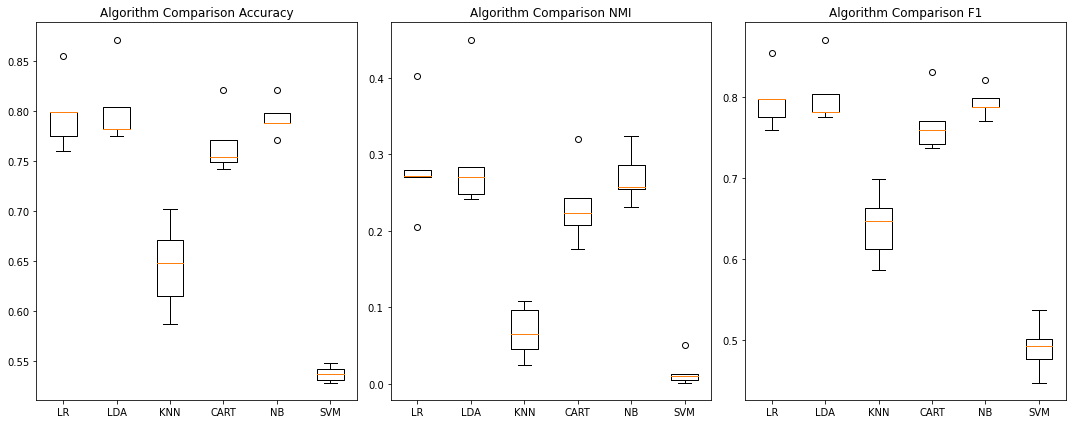

In [ ]:
results_Spot_Check_Algorithms , best_prediction_1 = Spot_Check_Algorithms(X_train , y_train)

LR :  0.8961252802690584
LDA :  0.8879974775784752
KNN :  0.8879974775784752
CART :  0.8879974775784752
NB :  0.8879974775784752
SVM :  0.8879974775784752


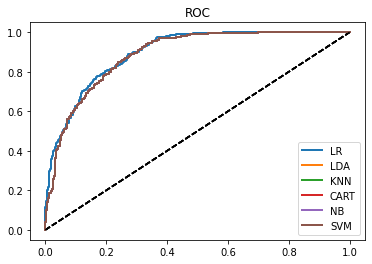

In [ ]:
#####################    
# Roc Curves
#####################

for model_name in best_prediction_1:
  fpr, tpr, thresholds = roc_curve(y_train,best_prediction_1[model_name][:,1])
  plot_roc_curve(fpr,tpr, label=model_name)

plt.legend()
plt.title('ROC')
plt.savefig("roc.svg", format="svg")

for model_name in best_prediction_1:
    print(model_name, ": ", roc_auc_score(y_train, best_prediction_1[model_name][:,1]))

Accuracy :  AB: 0.798638 (0.020197)
nmi :  AB: 0.282497 (0.040777)
f1_score :  AB: 0.798818 (0.019919)
############################################################
Accuracy :  LGBM: 0.829954 (0.023781)
nmi :  LGBM: 0.350398 (0.054460)
f1_score :  LGBM: 0.830071 (0.023681)
############################################################
Accuracy :  RF: 0.826583 (0.027429)
nmi :  RF: 0.355361 (0.035381)
f1_score :  RF: 0.820289 (0.026715)
############################################################
Accuracy :  ET: 0.804206 (0.028415)
nmi :  ET: 0.321687 (0.053928)
f1_score :  ET: 0.806826 (0.022393)
############################################################
Accuracy :  XGB: 0.814287 (0.027920)
nmi :  XGB: 0.316469 (0.053354)
f1_score :  XGB: 0.814631 (0.027549)
############################################################


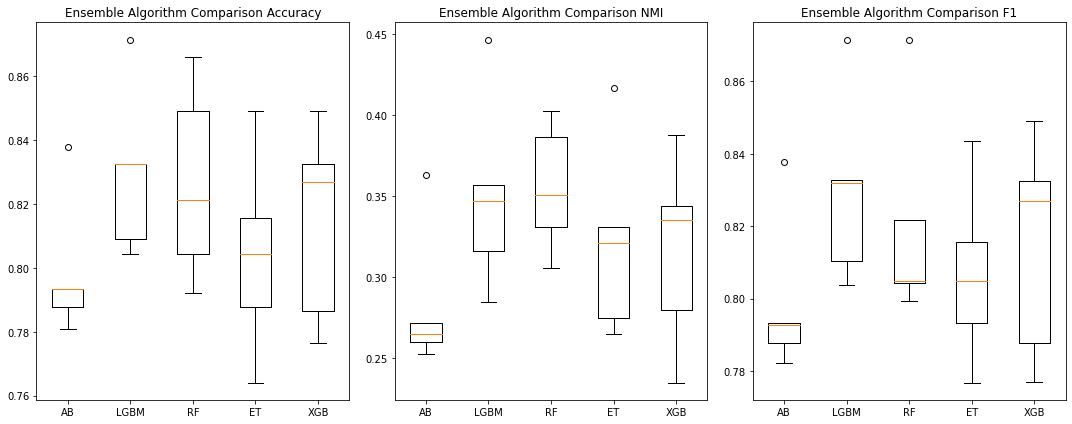

In [ ]:
results_ensembles , best_prediction_2 = ensembles_methods(X_train , y_train)

AB :  0.8878773622677771
LGBM :  0.9108594250480461
RF :  0.9108594250480461
ET :  0.9108594250480461
XGB :  0.9108594250480461


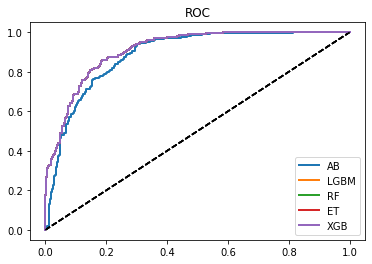

In [ ]:
#####################    
# Roc Curves
#####################

for model_name in best_prediction_2:
  fpr, tpr, thresholds = roc_curve(y_train,best_prediction_2[model_name][:,1])
  plot_roc_curve(fpr,tpr, label=model_name)

plt.legend()
plt.title('ROC')
plt.savefig("roc.svg", format="svg")

for model_name in best_prediction_2:
    print(model_name, ": ", roc_auc_score(y_train, best_prediction_2[model_name][:,1]))

In [ ]:
frames = [results_Spot_Check_Algorithms, results_ensembles]

final_results = pd.concat(frames)
final_results

,Accuracy,NMI,F1_score
LR,0.797514,0.285829,0.797670
LDA,0.803101,0.298721,0.803061
KNN,0.644360,0.067827,0.641783
CART,0.767309,0.234159,0.768436
NB,0.793070,0.270333,0.793516
SVM,0.536903,0.015956,0.491083
AB,0.798638,0.282497,0.798818
LGBM,0.829954,0.350398,0.830071
RF,0.826583,0.355361,0.820289
ET,0.804206,0.321687,0.806826


In [ ]:
best_score , best_params = tune_ExtraTrees(X_train , y_train)

Best: 0.833287 using {'max_depth': 16, 'max_features': 4, 'min_samples_split': 4, 'n_estimators': 20}
0.779606 (0.024490) with: {'max_depth': 4, 'max_features': 4, 'min_samples_split': 2, 'n_estimators': 20}
0.799755 (0.022380) with: {'max_depth': 4, 'max_features': 4, 'min_samples_split': 2, 'n_estimators': 50}
0.798638 (0.021688) with: {'max_depth': 4, 'max_features': 4, 'min_samples_split': 2, 'n_estimators': 100}
0.806472 (0.019065) with: {'max_depth': 4, 'max_features': 4, 'min_samples_split': 2, 'n_estimators': 150}
0.800885 (0.029330) with: {'max_depth': 4, 'max_features': 4, 'min_samples_split': 2, 'n_estimators': 200}
0.776279 (0.014675) with: {'max_depth': 4, 'max_features': 4, 'min_samples_split': 4, 'n_estimators': 20}
0.795298 (0.014865) with: {'max_depth': 4, 'max_features': 4, 'min_samples_split': 4, 'n_estimators': 50}
0.807614 (0.017791) with: {'max_depth': 4, 'max_features': 4, 'min_samples_split': 4, 'n_estimators': 100}
0.797521 (0.013236) with: {'max_depth': 4, 'ma

In [ ]:
best_score

0.8332873014876656

##############################################################
Accuracy = 	 0.8482142857142857
##############################################################
              precision    recall  f1-score   support

           0       0.92      0.76      0.83       113
           1       0.79      0.94      0.86       111

    accuracy                           0.85       224
   macro avg       0.86      0.85      0.85       224
weighted avg       0.86      0.85      0.85       224

##############################################################


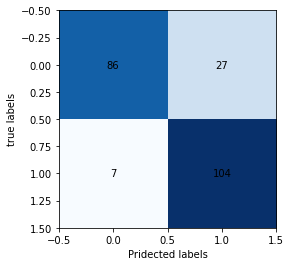

In [ ]:
Finalize_ExtraTrees_Model(X_train , y_train , X_test , y_test , best_params['max_depth'] , best_params['max_features'], best_params['min_samples_split'], best_params['n_estimators'])

##############################################################
Accuracy = 	 0.8348214285714286
##############################################################
              precision    recall  f1-score   support

           0       0.90      0.76      0.82       113
           1       0.79      0.91      0.85       111

    accuracy                           0.83       224
   macro avg       0.84      0.84      0.83       224
weighted avg       0.84      0.83      0.83       224

##############################################################


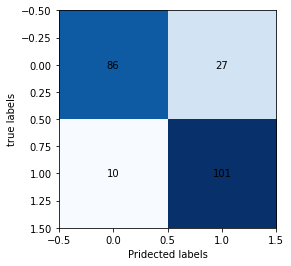

In [ ]:
Finalize_LGBM_Model(X_train , y_train , X_test , y_test)